# Assingment - Linear regression
Mikko Kettunen<br>
Last edited: 05.03.2020<br>
Mathematics and Methods in Machine Learning and Neural Networks<br>

# Background
The aim of this notebook is to create a linear regression model, that predicts alcohol content of a wines based on their other values.
<br>
<br>

1. The equation for our multiple regression model is:
Yi = β1xi1 + ... + βpxip + εi
<br>
<br>
2. The 5 most useful variables are fixed acidity, volatile acidity, citric acid, pH and sulfates. Results were estimated from the coefficients calculated in the last cell.
<br>
<br>
3. We divided the data, 80% to training and 20% to testing. The MSE and and R2S values were approximately: 0.555 and 0.537 in the training set. With the testing set the values were approximately: 0.474 and 0.450

In [22]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# read data
df = pd.read_csv('winequality-red.csv', sep=';')
del df['quality'] # Delete the wine quality column
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [23]:
# split into input and output variables 
# Alcohol content was chosen as the trait
X = df.iloc[:,1:10]
Y = df.iloc[:,10]

# Divide dataframe to training and testing sets in 80/20 division
X, X2, Y, Y2 = train_test_split(X, Y, test_size=0.20, shuffle=False)

# build and fit model
reg = linear_model.LinearRegression()
reg.fit(X,Y)

# compute predicted values
Y_pred = reg.predict(X)
Y2_pred = reg.predict(X2)

# compute error statistics
mse = mean_squared_error(Y, Y_pred)
r2s = r2_score(Y, Y_pred) 
print("MSE = ", mse)
print("R2s = ", r2s)
print()

# Split validation error statistics
mse = mean_squared_error(Y2, Y2_pred)
r2s = r2_score(Y2, Y2_pred) 
print("MSE = ", mse)
print("R2s = ", r2s)

MSE =  0.5553620953326607
R2s =  0.5372765558524137

MSE =  0.47457703762942194
R2s =  0.4501437225946795


In [24]:
# merge observed and predicted values and compute residuals
df2 = pd.concat([Y, pd.Series(Y_pred), pd.Series(Y-Y_pred)], axis=1)
df2.columns=['observed','predicted','residual']
print(df2)

      observed  predicted  residual
0          9.4   9.554906 -0.154906
1          9.8   9.717979  0.082021
2          9.8   9.677205  0.122795
3          9.8  10.041558 -0.241558
4          9.4   9.554906 -0.154906
...        ...        ...       ...
1274      11.2  10.706885  0.493115
1275       9.5   9.822938 -0.322938
1276      12.0  12.362739 -0.362739
1277       9.7   9.925193 -0.225193
1278       9.5   9.822938 -0.322938

[1279 rows x 3 columns]


<Figure size 432x288 with 0 Axes>

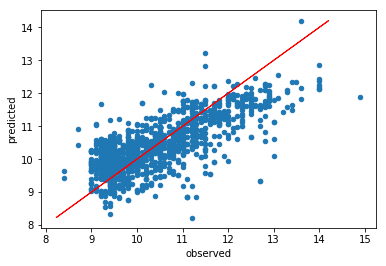

In [25]:
# plot observed vs predicted values
plt.figure()
df2.plot.scatter(x='observed', y='predicted')
plt.plot(Y_pred, Y_pred, color='red', linewidth=1)
plt.show()

<Figure size 432x288 with 0 Axes>

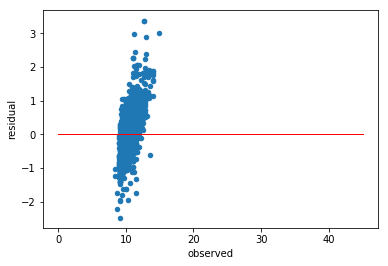

In [26]:
# plot residuals
plt.figure()
df2.plot.scatter(x='observed', y='residual')
plt.plot([0,45], [0,0], color='red', linewidth=1)
plt.show()

In [27]:
# normalize variables and rerun MLR analysis to
# estimate variable importance
scaler = StandardScaler()
dfn = pd.DataFrame(scaler.fit_transform(df))
print(dfn)
Xn = dfn.iloc[:,1:10]
Yn = dfn.iloc[:,10]
reg2 = linear_model.LinearRegression()
reg2.fit(Xn,Yn)
print("Standardized variables...")
print("Coefficients:" ,reg2.coef_)

             0         1         2         3         4         5         6  \
0    -0.528360  0.961877 -1.391472 -0.453218 -0.243707 -0.466193 -0.379133   
1    -0.298547  1.967442 -1.391472  0.043416  0.223875  0.872638  0.624363   
2    -0.298547  1.297065 -1.186070 -0.169427  0.096353 -0.083669  0.229047   
3     1.654856 -1.384443  1.484154 -0.453218 -0.264960  0.107592  0.411500   
4    -0.528360  0.961877 -1.391472 -0.453218 -0.243707 -0.466193 -0.379133   
...        ...       ...       ...       ...       ...       ...       ...   
1594 -1.217796  0.403229 -0.980669 -0.382271  0.053845  1.542054 -0.075043   
1595 -1.390155  0.123905 -0.877968 -0.240375 -0.541259  2.211469  0.137820   
1596 -1.160343 -0.099554 -0.723916 -0.169427 -0.243707  1.255161 -0.196679   
1597 -1.390155  0.654620 -0.775267 -0.382271 -0.264960  1.542054 -0.075043   
1598 -1.332702 -1.216849  1.021999  0.752894 -0.434990  0.203223 -0.135861   

             7         8         9        10  
0     0.558274  